# Intro to Python
A short tutorial

In [32]:
import numpy as np

In [ ]:
from myfile import myfunction

## How to get help

* `help()` function
* shift-tab docstring
* ? or ?? 

In [3]:
??np.sqrt

In [33]:
np.sqrt(2)

1.4142135623730951

## Jupyter notebook magic
* https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [4]:
!ls -la

total 11824
drwxr-xr-x  6 mloning  staff      192 12 Nov 17:19 .
drwxr-xr-x  5 mloning  staff      160  9 Nov 15:54 ..
drwxr-xr-x  3 mloning  staff       96  9 Nov 15:54 .ipynb_checkpoints
-rw-r--r--  1 mloning  staff     6348 12 Nov 17:19 Intro_to_Python.ipynb
-rwxr-xr-x@ 1 mloning  staff  5090816 12 Nov 16:59 Intro_to_Python.key
-rw-r--r--  1 mloning  staff   281234  9 Nov 16:34 Intro_to_Python.slides.html


In [5]:
x = np.random.random()

In [6]:
x

0.16865602884836128

In [7]:
%timeit x ** 2

63.3 ns ± 0.303 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [8]:
%timeit x * x

35.4 ns ± 0.0844 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Object oriented programming

In [9]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def grow_up(self):
        self.age += 1

In [10]:
p = Person("Terry", 78)

In [11]:
p

In [12]:
p.age

78

In [13]:
p.grow_up()
p.age

79

* encapsulation
* object-oriented design patterns
* information hiding
* encapsulation
* varying states of objects
* re-usability

## Parallelise code

In [14]:
[np.sqrt(i ** 2) for i in range(10)]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [15]:
from joblib import Parallel, delayed
Parallel(n_jobs=2)(delayed(np.sqrt)(i ** 2) for i in range(10))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

## Machine learning workflow

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_diabetes
import pandas as pd

In [17]:
dataset = load_diabetes()
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [18]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [19]:
X.shape

(442, 10)

In [22]:
y = dataset.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.75)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(331, 10) (331,) (111, 10) (111,)


In [24]:
lr = LinearRegression()

In [26]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

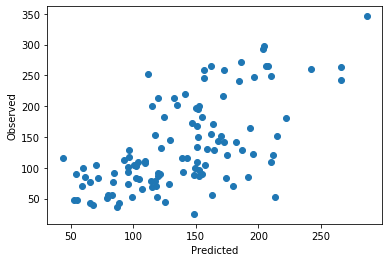

In [28]:
fig, ax = plt.subplots(1)
ax.scatter(y_pred, y_test);
ax.set(xlabel="Predicted", ylabel="Observed");

In [29]:
# inspect fitted lr object
coefs = lr.coef_
coefs

array([   9.07638566, -278.91220615,  595.57373723,  267.10740453,
       -809.71017261,  405.82440188,  142.15436545,  255.60604897,
        695.20502896,  103.52380866])

In [30]:
r2_score(y_test, y_pred)

0.38979824335231794

In [31]:
# easily parallisable 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.37457247116251235